# 영화 추천 시스템

- Item-based Collaborative Filtering (아이템기반 협업 필터링)
- Dataset MovieLens: https://grouplens.org/datasets/movielens/100k/ 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
os.chdir('추천시스템')

# 파일 불러오기

In [3]:
movie_title = pd.read_csv('Movie_Id_Titles.csv')

In [4]:
movie_title

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


### u.data 불러오기

- 컬럼: userid,itemid,rating,timestamp

In [5]:
movie_rating = pd.read_csv('u.data',sep='\t',names=['user_id','item_id','rating','timestamp'])

In [6]:
movie_rating

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [7]:
# timestamp 컬럼 삭제
movie_rating.drop('timestamp',axis=1,inplace=True)

In [8]:
# item id 기준 정렬
movie_rating.sort_values('item_id',inplace=True)

In [9]:
movie_rating

,user_id,item_id,rating
25741,84,1,2
93639,806,1,4
55726,768,1,5
49529,92,1,4
89079,419,1,4
...,...,...,...
75323,863,1678,1
67302,863,1679,3
80394,863,1680,2
92329,896,1681,3


In [10]:
movie_rating.describe()

,user_id,item_id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


- 총 평점 개수는 100000만 건이지만
- 고객 id 수: 943 명
- 영화 id 수: 1682 건
- 평점은 1~5
- 한 고객이 영화별로 평을 줌. 

# 영화제목 프레임과 합치기

In [11]:
movie_rating = pd.merge(movie_rating,movie_title, on='item_id',how='outer')

In [12]:
movie_rating

,user_id,item_id,rating,title
0,84,1,2,Toy Story (1995)
1,806,1,4,Toy Story (1995)
2,768,1,5,Toy Story (1995)
3,92,1,4,Toy Story (1995)
4,419,1,4,Toy Story (1995)
...,...,...,...,...
99995,863,1678,1,Mat' i syn (1997)
99996,863,1679,3,B. Monkey (1998)
99997,863,1680,2,Sliding Doors (1998)
99998,896,1681,3,You So Crazy (1994)


# 영화별로 평점 확인

In [13]:
title_grouped = movie_rating.groupby('title')['rating']

In [14]:
# 각 영화에 대해 기본 통계치 확인
# 초 평점개수/평점평균/표준편차/평점최소/25%/50%/75%/평점최대
title_grouped.describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


## 영화 평점 평균

In [15]:
rating_mean_ = title_grouped.mean() # 기존 그룹바이 활용 시 
rating_mean_

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [16]:
# 또는 아래의 방식으로 모을 수 있다.

In [17]:
rating_mean = movie_rating.groupby('title').agg({'rating':'mean'})
rating_mean

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [18]:
print(type(rating_mean_),type(rating_mean))
# 시리즈와 데이터프레임으로 출력 형태가 다름. 아래부터 보기 이쁜 데이터프레임 사용

<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


## 영화 평점 개수

In [19]:
rating_count_ = title_grouped.count() # 기존 그룹바이 활용 시 
rating_count_
# 또는
rating_count = movie_rating.groupby('title').agg({'rating':'count'})
rating_count

,rating
title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41
...,...
Young Guns II (1990),44
"Young Poisoner's Handbook, The (1995)",41
Zeus and Roxanne (1997),6


# 영화별 평점 평균/개수 데이터프레임 합치기

In [20]:
# (df+df+keys -> 다중인덱스) 예를들면
ratings = pd.concat([rating_mean,rating_count],axis=1,keys=['rating_mean','rating_count'])
ratings
# 이렇게 되어버림

,rating_mean,rating_count
,rating,rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41


In [21]:
# merge 사용해서 붙인 경우 -> column 따로 변경 필요
ratings = pd.merge(rating_mean,rating_count,on='title')
ratings

,rating_x,rating_y
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [22]:
# 한번에 컬럼이름 지정하기에는 series+series가 나은듯해서 시리즈 사용
ratings = pd.concat([rating_mean_,rating_count_],axis=1,keys=['rating_mean','rating_count'])
ratings

,rating_mean,rating_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [23]:
ratings

,rating_mean,rating_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


# 히스토그램 확인

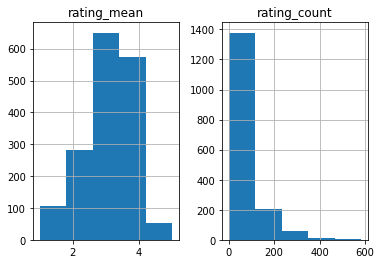

In [24]:
ratings.hist(bins=5) # hist: bin 지정 가능
plt.show()

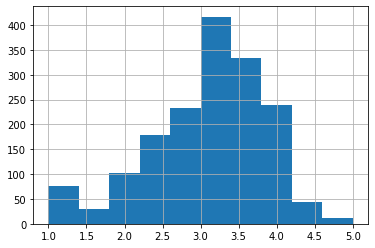

In [25]:
## 따로 hist
ratings.rating_mean.hist()
plt.show()

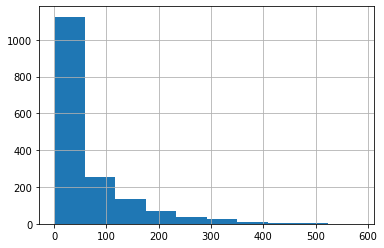

In [26]:
ratings.rating_count.hist()
plt.show()

In [27]:
# 평균점수 5점인 영화 확인
ratings[ratings.rating_mean==5]

,rating_mean,rating_count
title,,
Aiqing wansui (1994),5.0,1
Entertaining Angels: The Dorothy Day Story (1996),5.0,1
"Great Day in Harlem, A (1994)",5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
Prefontaine (1997),5.0,3
"Saint of Fort Washington, The (1993)",5.0,2
Santa with Muscles (1996),5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


- 평가 횟수가 몇 건 안됨

In [28]:
# 사람들이 평가 많이 한 영화 100개
ratings.sort_values('rating_count',ascending=False).head(100)

,rating_mean,rating_count
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
Aladdin (1992),3.812785,219
Babe (1995),3.995434,219
Volcano (1997),2.808219,219


In [29]:
# 평점 높은 top 100개 & 평가 10개 이하 제외
movie_top100 = ratings.sort_values('rating_mean',ascending=False)
movie_top100.drop(movie_top100[movie_top100.rating_count<=10].index,axis=0,inplace=True)
movie_top100.head(100)

,rating_mean,rating_count
title,,
"Close Shave, A (1995)",4.491071,112
Schindler's List (1993),4.466443,298
"Wrong Trousers, The (1993)",4.466102,118
Casablanca (1942),4.456790,243
Wallace & Gromit: The Best of Aardman Animation (1996),4.447761,67
...,...,...
"Man Who Would Be King, The (1975)",4.025000,80
"Wild Bunch, The (1969)",4.023256,43
"Great Dictator, The (1940)",4.021739,46


In [30]:
# # top100개 영화제목만 출력
# movie_top100.index[:100]

# ITEM-BASED COLLABORATIVE FILTERING
- 샘플 영화: Titanic

In [31]:
# 피봇테이블 활용, 콜라보레이티브 필터링 포맷으로 변경

In [32]:
movie_rating.head(3)

,user_id,item_id,rating,title
0,84,1,2,Toy Story (1995)
1,806,1,4,Toy Story (1995)
2,768,1,5,Toy Story (1995)


In [33]:
movie_rating.corr()

,user_id,item_id,rating
user_id,1.000000,0.010377,-0.009371
item_id,0.010377,1.000000,-0.189124
rating,-0.009371,-0.189124,1.000000


In [34]:
userid_movietitle_matrix = movie_rating.pivot_table(index='user_id',columns='title',values='rating')

In [35]:
userid_movietitle_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# 129번 유저가 타이타닉에 준 점수
userid_movietitle_matrix.loc[129,'Titanic (1997)']

3.0

In [37]:
# 타이타닉을 본 사람들
userid_movietitle_matrix['Titanic (1997)']

user_id
1      NaN
2      5.0
3      NaN
4      NaN
5      NaN
      ... 
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 943, dtype: float64

In [38]:
# 전체 영화와 영화 타이타닉의 상관관계
# 타이타닉을 본 사람들에게 타이타닉과 상관계수 높은 영화 추천
titanic_corr = userid_movietitle_matrix.corrwith(userid_movietitle_matrix['Titanic (1997)'])
titanic_corr.sort_values(ascending=False, inplace=True)
titanic_corr # 결과는 시리즈 -> 데이터프레임으로 변형
titanic_corr = pd.DataFrame(titanic_corr, columns=['correlation'])
titanic_corr

,correlation
title,
"Newton Boys, The (1998)",1.0
"Pest, The (1997)",1.0
"Amazing Panda Adventure, The (1995)",1.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0
Hideaway (1995),1.0
...,...
Yankee Zulu (1994),NaN
You So Crazy (1994),NaN
Zeus and Roxanne (1997),NaN


In [39]:
# 각 영화의 평점과 평가 횟수 컬럼 추가
titanic_corr = pd.merge(titanic_corr, ratings, on='title')
titanic_corr

,correlation,rating_mean,rating_count
title,,,
"Newton Boys, The (1998)",1.0,3.000000,4
"Pest, The (1997)",1.0,1.875000,8
"Amazing Panda Adventure, The (1995)",1.0,2.800000,10
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.000000,3
Hideaway (1995),1.0,2.444444,9
...,...,...,...
Yankee Zulu (1994),NaN,1.000000,1
You So Crazy (1994),NaN,3.000000,1
Zeus and Roxanne (1997),NaN,2.166667,6


In [40]:
# 결측치 제거
titanic_corr.dropna(axis=0, inplace=True)

In [41]:
# 정확도를 위해 평가수가 80명 미만인 영화 추천에서 제외 
titanic_corr = titanic_corr[titanic_corr.rating_count>=80]

In [42]:
tt = titanic_corr.drop(['correlation','rating_count'],axis=1)
tt.columns = ['평균 평점']
tt['평균 평점'] = tt['평균 평점'].apply(lambda x: np.round(x,2))
print(f'\033[1m타이타닉과 연관 높은 영화 10가지 추천')
tt.iloc[1:11,:]

타이타닉과 연관 높은 영화 10가지 추천


,평균 평점
title,
"River Wild, The (1994)",3.14
"Abyss, The (1989)",3.59
Bram Stoker's Dracula (1992),3.16
True Lies (1994),3.56
William Shakespeare's Romeo and Juliet (1996),3.59
"Last of the Mohicans, The (1992)",3.55
Outbreak (1995),3.24
Demolition Man (1993),3.15
Die Hard (1988),3.87


- 샘플 영화2: Star Wars

In [43]:
# 영화 스타워즈 타이틀 찾기
[s for s in ratings.index.to_list() if 'Star' and 'Wars' in s]

['Star Wars (1977)']

In [44]:
userid_movietitle_matrix['Star Wars (1977)']

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [45]:
starwars_corr = userid_movietitle_matrix.corrwith(userid_movietitle_matrix['Star Wars (1977)'])

In [46]:
starwars_corr = pd.DataFrame(starwars_corr, columns=['corrlation'])
starwars_corr.sort_values('corrlation', ascending=False, inplace=True)
starwars_corr = pd.merge(starwars_corr,ratings, on='title')
starwars_corr = starwars_corr[starwars_corr.rating_count>=80]
starwars_corr.dropna(axis=0, inplace=True)
starwars_corr.head(10)

,corrlation,rating_mean,rating_count
title,,,
Star Wars (1977),1.000000,4.358491,583
"Empire Strikes Back, The (1980)",0.747981,4.204360,367
Return of the Jedi (1983),0.672556,4.007890,507
Raiders of the Lost Ark (1981),0.536117,4.252381,420
Austin Powers: International Man of Mystery (1997),0.377433,3.246154,130
"Sting, The (1973)",0.367538,4.058091,241
Indiana Jones and the Last Crusade (1989),0.350107,3.930514,331
Pinocchio (1940),0.347868,3.673267,101
"Frighteners, The (1996)",0.332729,3.234783,115


# ITEM-BASED COLLABORATIVE FILTER
- 전체 데이터셋

In [100]:
movie_corr = userid_movietitle_matrix.corr()

In [107]:
# 80명이상 평가가 있는 신뢰도 있는 데이터
movie_corr = userid_movietitle_matrix.corr(min_periods=80)
movie_corr

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 나의 영화 평점을 기반으로 영화 추천

- My_Ratings.csv

In [70]:
myratings = pd.read_csv('My_Ratings.csv')
myratings # Ratings가 가중치 역할

,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1
2,Dirty Dancing (1987),4


In [108]:
# pipeline 작업
recommend_movie_list = []
for i in range(0, len(myratings)):
    movie_title = myratings.iloc[i,0] # 영화이름 추출
    similar_movie = movie_corr[movie_title].dropna().sort_values(ascending=False).to_frame() # 타이타닉처럼 특정 영화 상관도 확인
    similar_movie.columns = ['correlation']
    similar_movie['weights'] = similar_movie['correlation'] * myratings.iloc[i,1]
    recommend_movie_list.append(similar_movie)
recommend_movie_list = pd.concat(recommend_movie_list)

In [109]:
recommend_movie_list.sort_values('weights',ascending=False).head(7)

,correlation,weights
title,,
Liar Liar (1997),1.000000,5.000000
Dirty Dancing (1987),1.000000,4.000000
Con Air (1997),0.469828,2.349141
Pretty Woman (1990),0.469790,2.348951
Michael (1996),0.442022,2.210110
Indiana Jones and the Last Crusade (1989),0.414427,2.072136
Top Gun (1986),0.405720,2.028602


In [120]:
movie_corr = userid_movietitle_matrix.corr()
# pipeline 작업
recommend_movie_list = []
for i in range(0, len(myratings)):
    movie_title = myratings.iloc[i,0] # 영화이름 추출
    similar_movie = userid_movietitle_matrix.corrwith(userid_movietitle_matrix[movie_title]).dropna().sort_values(ascending=False).to_frame()
    similar_movie.columns = ['correlation']

    similar_movie = pd.merge(similar_movie, ratings, on='title')
    similar_movie = similar_movie[similar_movie.rating_count>=80]
    
#     similar_movie = movie_corr[movie_title].sort_values(ascending=False).to_frame() # 타이타닉처럼 특정 영화 상관도 확인
    similar_movie['weights'] = similar_movie['correlation'] * myratings.iloc[i,1]
    recommend_movie_list.append(similar_movie)
recommend_movie_list = pd.concat(recommend_movie_list)

In [122]:
recommend_movie_list.head(7)

,correlation,rating_mean,rating_count,weights
title,,,,
Liar Liar (1997),1.000000,3.156701,485,5.000000
Batman Forever (1995),0.516968,2.666667,114,2.584838
Bean (1997),0.504689,2.659341,91,2.523447
"Mask, The (1994)",0.484650,3.193798,129,2.423249
Down Periscope (1996),0.472681,2.702970,101,2.363403
Con Air (1997),0.469828,3.459854,137,2.349141
Pretty Woman (1990),0.469790,3.323171,164,2.348951


In [98]:
for i in range(0, len(myratings)):
    movie_title = myratings.iloc[i,0] 
    print(movie_title)
    similar_movie = movie_corr[movie_title].sort_values(ascending=False)[1:].to_frame() # 타이타닉처럼 특정 영화 상관도 확인
    similar_movie.columns = ['correlation']
    print(similar_movie.head(2))

Liar Liar (1997)
                     correlation
title                           
Con Air (1997)          0.469828
Pretty Woman (1990)     0.469790
Star Wars (1977)
                                 correlation
title                                       
Empire Strikes Back, The (1980)     0.747981
Return of the Jedi (1983)           0.672556
Dirty Dancing (1987)
                                  correlation
title                                        
Back to the Future (1985)            0.374493
Silence of the Lambs, The (1991)     0.061601
